In [3]:
#import libraries:
import pandas as pd
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as dt
from matplotlib import style


In [4]:
#read in dataset:
heart = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
heart


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Categorical variable

* HeartDiseaseorAttack: 0 (no heart disease), 1 (heart disease) 

* HighBP: 0 (no high blood pressure), 1 (high blood pressure)

* HighChol: 0 (no high cholesterol), 1 (high cholesterol)

* CholCheck: Cholesterol check within past five years. 0 (not check), 1 (check)

* Smoker: 0 (no smoker), 1 (smoker)

* Strok: 0 (no strok), 1 (strok)

* Diabetes: diabetes type.

* PhysActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job. 0 (no physical activity), 1 (physical activity).

* Fruits: 0 (no fruit consumed per day), 1 (consumed 1 or more pieces of fruit per day).

* Veggies: 0 (no vegetables consumed per day), 1 (consumed 1 or more pieces of vegetable per day).

* HvyAlcoholConsump: 0 (no for heavy drinking), 1 (heavy drinking).

* AnyHealthcare: 0 (No health care), 1 (health care).

* NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 (no), 1 (yes).

* GenHlth: Would you say that in general your health is: (1 is Excellent -> 5 is Poor)

* DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 (no), 1 (yes).

* Sex: 0 (female), 1 (male)

* Age: 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.

* Education: What is the highest grade or year of school you completed? 1 being never attended school or kindergarten only up to 6 being college 4 years or more (Scale here is 1-6).

* Income: 1 being less than $10,000 all the way up to 8 being $75,000 or more


### Continuous variable

* BMI: Body Mass Index

* MentHlth: How many days during the past 30 days was your mental health not good? Scale will be 0-30.

* PhysHlth: How many days during the past 30 days was your physical health not good? Scale will be 0-30.

source: https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/notebook


In [11]:
#Continuous variable summary 
cts_col=heart[['HeartDiseaseorAttack','BMI','MentHlth','PhysHlth']]
cts_col.describe()

,HeartDiseaseorAttack,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,28.382364,3.184772,4.242081
std,0.292087,6.608694,7.412847,8.717951
min,0.000000,12.000000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000
75%,0.000000,31.000000,2.000000,3.000000
max,1.000000,98.000000,30.000000,30.000000


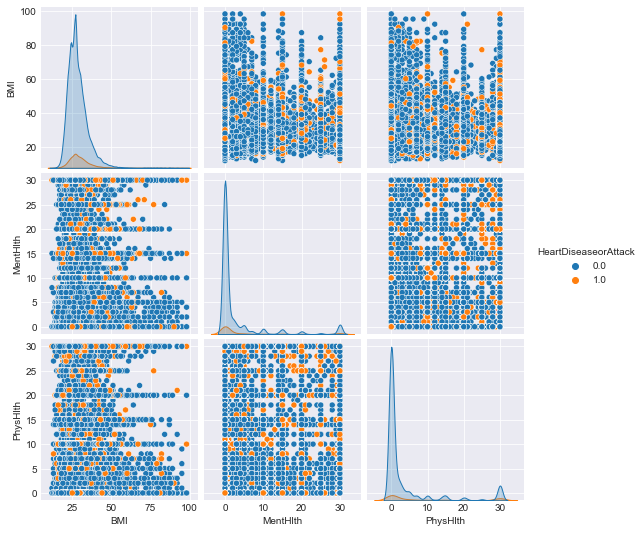

In [12]:
##plot all Continuous variables in dataset
sns.pairplot(cts_col, hue="HeartDiseaseorAttack")

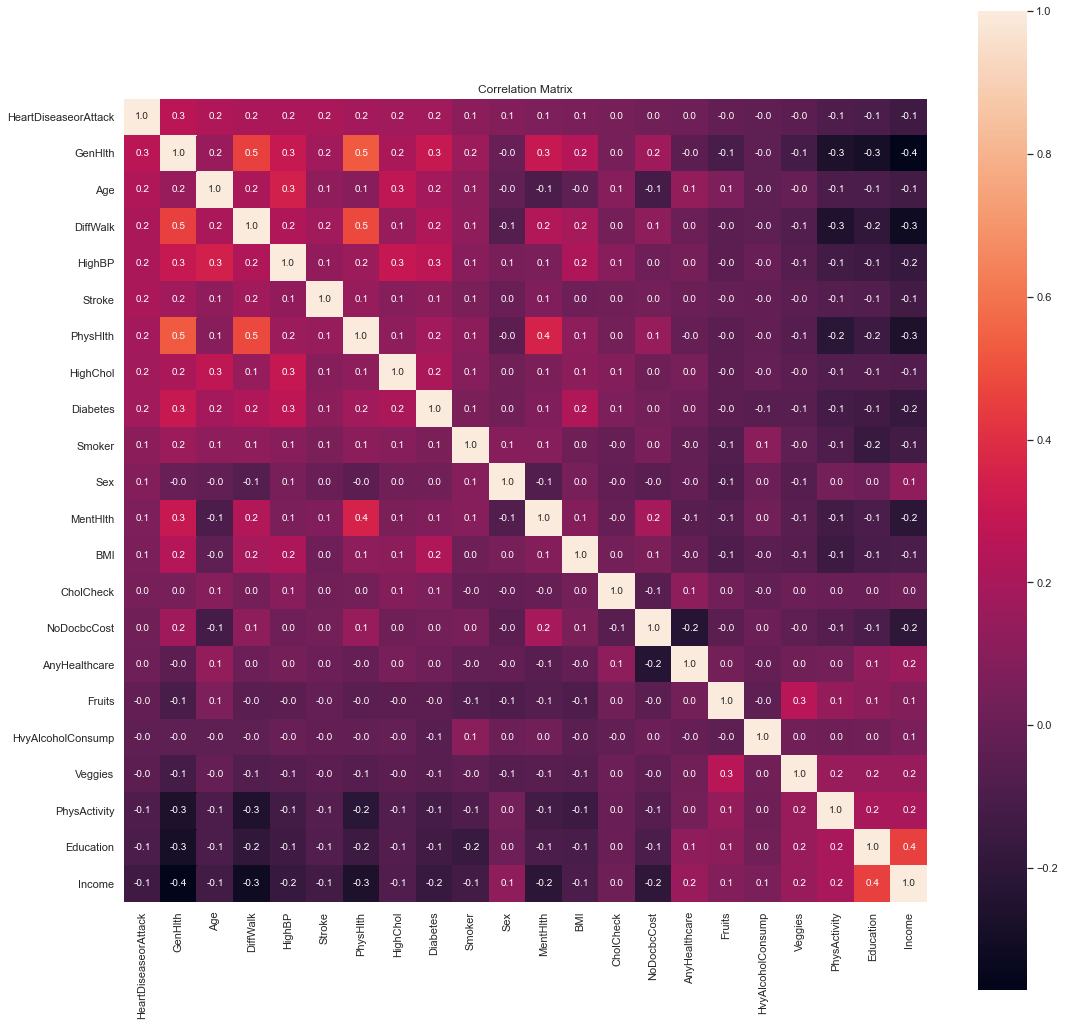

In [15]:
# correlation matrix
correlation_matrix = heart.corr()
k = 22 # number of variables for heatmap
cols = correlation_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = np.corrcoef(heart[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(18,18))  # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

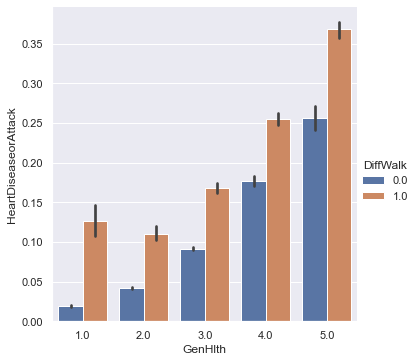

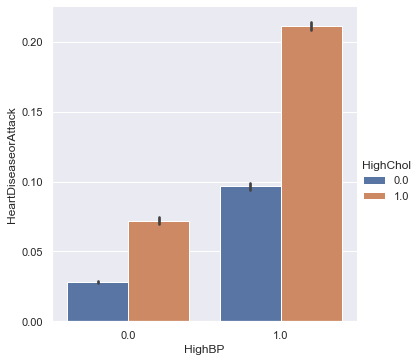

In [28]:
#Select highly correlated variables ( more than 0.2)to in-depth analysis of some graphs
#GenHlth, Age, DiffWalk, HighBP, Stroke, PhysHlth,  HighChol, Diabetes

##high correlation categories variables relationship plots
#genhlth, diffwalk vs heart
sns.catplot(x="GenHlth", y="HeartDiseaseorAttack", hue="DiffWalk", kind="bar", data=heart)

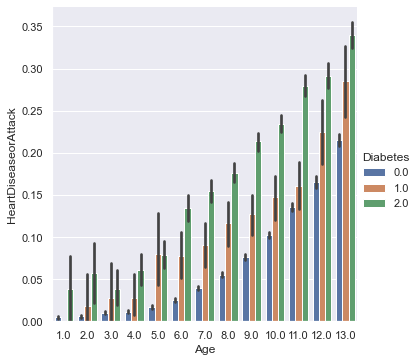

In [25]:
#age, Diabetes vs heart
sns.catplot(x="Age", y="HeartDiseaseorAttack", hue="Diabetes", kind="bar", data=heart)

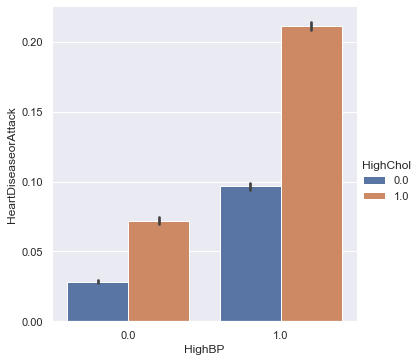

In [29]:
#HighBP, HighChol vs heart
sns.catplot(x="HighBP", y="HeartDiseaseorAttack", hue="HighChol", kind="bar", data=heart)

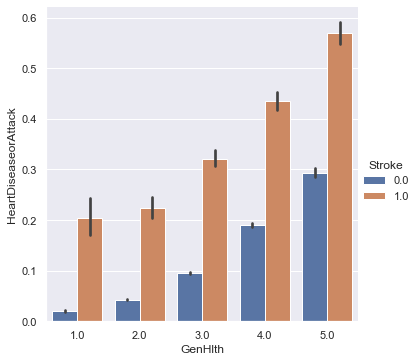

In [31]:
#Stroke, GenHlth vs heart
sns.catplot(x="GenHlth", y="HeartDiseaseorAttack", hue="Stroke", kind="bar", data=heart)

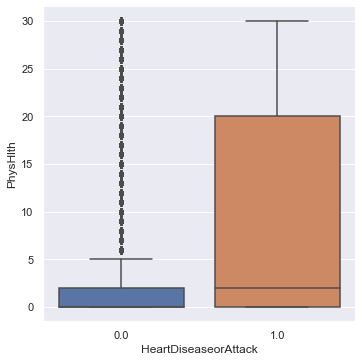

In [37]:
#boxplot for PhysHlth and HeartDiseaseorAttack
sns.catplot(x="HeartDiseaseorAttack", y="PhysHlth", kind="box", data=heart)